<a href="https://colab.research.google.com/github/Lucs1590/strava-analysis/blob/main/strava_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strava Analysis
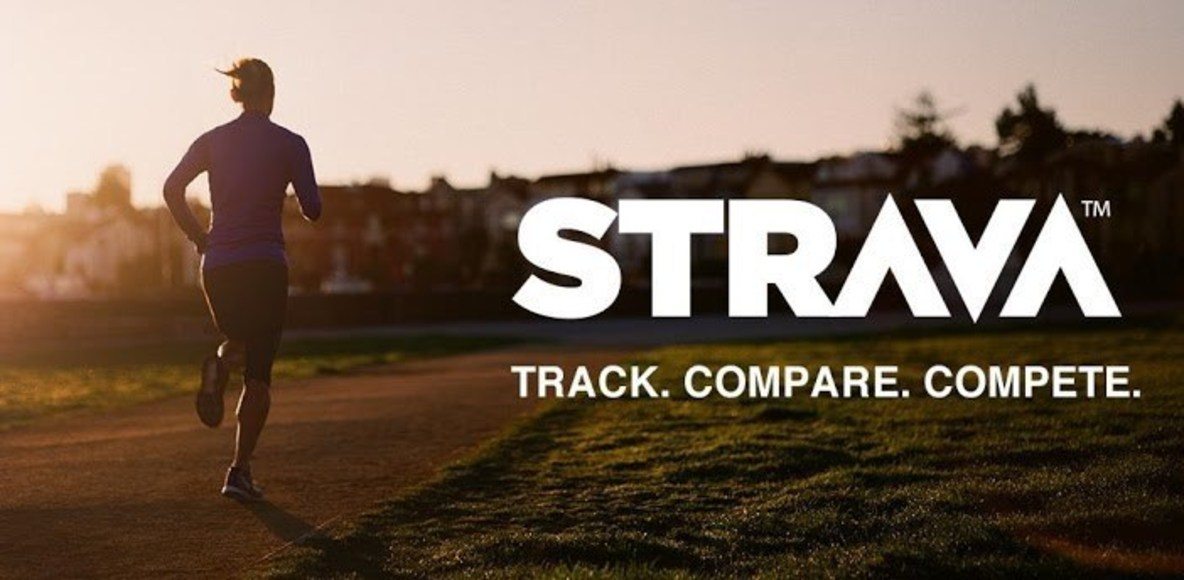
This notebook aims to do a data exploration looking for a pattern in the user data and then try to predict a certain pace based on the user data.

# Imports

In [ ]:
# pip3 install autosklearn

In [83]:
# general
import subprocess
import calendar
from geopy.geocoders import Nominatim

# df and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# machine learning and math
import math
import autosklearn.regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Getting data and first contact

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib widget
%matplotlib inline

In [3]:
subprocess.call(['python3', 'get_activities.py'])

Getting data from Strava
Getting data from page 1
Saving data/strava_activities_page_1.csv
Getting data from page 2
Saving data/strava_activities_page_2.csv
Getting data from page 3
Merging files
Saving result/strava_all_activities.csv
Done Successfully


0

In [4]:
df = pd.read_csv('result/strava_all_activities.csv')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts
0,0,0,2,Corrida ao entardecer,5071.0,1413,1426,24.9,Run,Run,NaN,8084194066,2022-11-07T21:05:35Z,2022-11-07T18:05:35Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,4,4,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.103855, -50.178402]","[-22.10412, -50.17807]",3.589,10.477,83.0,True,169.5,181.0,False,True,597.1,587.8,8.654095e+09,8.654095e+09,shealth3ba16bdd-183c-4b25-a87d-999801445736.tcx,False,2,0,False,47005114,1,a8084194066,bd|eC`ngqHFYJMFCHBDCDKFW?OHKFk@DOJKBi@FUJOD?DG...,2,NaN,NaN,NaN
1,1,1,2,Caminhada ao entardecer,5.0,5,253,0.0,Walk,Walk,NaN,8084192044,2022-11-07T21:00:42Z,2022-11-07T18:00:42Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,3,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.103764, -50.17861]","[-22.103783, -50.178566]",1.001,1.001,119.0,True,121.0,130.0,False,True,596.6,596.6,8.654093e+09,8.654093e+09,shealthfc6f67fd-eba8-41bc-88f1-1b3d0c3368f6.tcx,False,0,0,False,47005114,1,a8084192044,pc|eChogqHBG,2,NaN,NaN,NaN
2,2,2,2,Corrida ao entardecer,3811.4,1129,1210,16.9,Run,Run,NaN,8055100801,2022-11-01T22:25:02Z,2022-11-01T19:25:02Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,2,0,2,0,False,False,False,False,everyone,False,g7550415,"[-22.103725, -50.178867]","[-22.104502, -50.177254]",3.376,5.069,82.1,True,168.3,182.0,False,True,607.3,593.6,8.621085e+09,8.621085e+09,shealtha7303d83-9ae2-4f1e-99c3-3526cdeaf434.tcx,False,0,0,False,47005114,1,a8055100801,hc|eC|pgqHGDy@fBG^[dAMn@c@fDUpCAh@In@CfASbBWrC...,2,NaN,NaN,NaN
3,3,3,2,Caminhada ao entardecer,460.3,303,303,0.0,Walk,Walk,NaN,8033899756,2022-10-28T21:39:37Z,2022-10-28T18:39:37Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,5,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.103758, -50.178432]","[-22.101254, -50.180313]",1.519,2.482,115.5,True,134.3,141.0,False,True,598.6,585.9,8.596854e+09,8.596854e+09,shealth0fbf1070-92cf-4038-9851-3a96e1711bf3.tcx,False,0,0,False,47005114,1,a8033899756,nc|eCfngqHFJI?CHQAMGM?OGKHC`@Mb@?Zi@\IJGNCXAj@...,2,NaN,NaN,NaN
4,4,4,2,Corrida ao entardecer,4741.9,1418,1558,25.1,Run,Run,NaN,8033898138,2022-10-28T21:10:31Z,2022-10-28T18:10:31Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,1,4,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.103477, -50.178524]","[-22.105268, -50.175827]",3.344,4.836,81.9,True,174.7,184.0,False,True,597.9,587.8,8.596853e+09,8.596853e+09,shealth041629d1-f978-4e9b-b23b-eae1d37e51c9.tcx,False,0,0,False,47005114,1,a8033898138,va|eCxngqH?LVDHHND?SBG`@y@b@mAvAuCj@yAxAuCtAcC...,2,NaN,NaN,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'resource_state', 'name', 'distance',
       'moving_time', 'elapsed_time', 'total_elevation_gain', 'type',
       'sport_type', 'workout_type', 'id', 'start_date', 'start_date_local',
       'timezone', 'utc_offset', 'location_city', 'location_state',
       'location_country', 'achievement_count', 'kudos_count', 'comment_count',
       'athlete_count', 'photo_count', 'trainer', 'commute', 'manual',
       'private', 'visibility', 'flagged', 'gear_id', 'start_latlng',
       'end_latlng', 'average_speed', 'max_speed', 'average_cadence',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'average_watts',
       'kilojoule

In [7]:
df.shape

(264, 58)

In [8]:
df.isnull().sum().sum()

2223

In [9]:
null_df = [[col, df[col].isnull().sum()] for col in df.columns]
list(filter(lambda x: x[1]>0, null_df))

[['workout_type', 129],
 ['location_city', 264],
 ['location_state', 264],
 ['gear_id', 86],
 ['average_cadence', 98],
 ['average_heartrate', 167],
 ['max_heartrate', 167],
 ['elev_high', 46],
 ['elev_low', 46],
 ['upload_id', 42],
 ['upload_id_str', 42],
 ['external_id', 90],
 ['map.summary_polyline', 49],
 ['average_watts', 245],
 ['kilojoules', 245],
 ['device_watts', 243]]

## Data Cleaning

In [10]:
raw_df = df

In [11]:
selected_columns = ['resource_state', 'distance', 'moving_time', 'elapsed_time',
                    'total_elevation_gain', 'type','sport_type', 'id', 'start_date',
                    'start_date_local','location_country', 'achievement_count', 'kudos_count',
                    'comment_count','athlete_count', 'start_latlng',
                    'end_latlng', 'average_speed', 'max_speed', 'average_cadence',
                    'average_heartrate', 'max_heartrate', 'elev_high','elev_low',
                    'upload_id', 'external_id', 'pr_count', 'map.summary_polyline']

In [12]:
df = df[selected_columns]
df.head()

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,start_date_local,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline
0,2,5071.0,1413,1426,24.9,Run,Run,8084194066,2022-11-07T21:05:35Z,2022-11-07T18:05:35Z,Brasil,4,4,0,1,"[-22.103855, -50.178402]","[-22.10412, -50.17807]",3.589,10.477,83.0,169.5,181.0,597.1,587.8,8.654095e+09,shealth3ba16bdd-183c-4b25-a87d-999801445736.tcx,2,bd|eC`ngqHFYJMFCHBDCDKFW?OHKFk@DOJKBi@FUJOD?DG...
1,2,5.0,5,253,0.0,Walk,Walk,8084192044,2022-11-07T21:00:42Z,2022-11-07T18:00:42Z,Brasil,0,3,0,1,"[-22.103764, -50.17861]","[-22.103783, -50.178566]",1.001,1.001,119.0,121.0,130.0,596.6,596.6,8.654093e+09,shealthfc6f67fd-eba8-41bc-88f1-1b3d0c3368f6.tcx,0,pc|eChogqHBG
2,2,3811.4,1129,1210,16.9,Run,Run,8055100801,2022-11-01T22:25:02Z,2022-11-01T19:25:02Z,Brasil,0,2,0,2,"[-22.103725, -50.178867]","[-22.104502, -50.177254]",3.376,5.069,82.1,168.3,182.0,607.3,593.6,8.621085e+09,shealtha7303d83-9ae2-4f1e-99c3-3526cdeaf434.tcx,0,hc|eC|pgqHGDy@fBG^[dAMn@c@fDUpCAh@In@CfASbBWrC...
3,2,460.3,303,303,0.0,Walk,Walk,8033899756,2022-10-28T21:39:37Z,2022-10-28T18:39:37Z,Brasil,0,5,0,1,"[-22.103758, -50.178432]","[-22.101254, -50.180313]",1.519,2.482,115.5,134.3,141.0,598.6,585.9,8.596854e+09,shealth0fbf1070-92cf-4038-9851-3a96e1711bf3.tcx,0,nc|eCfngqHFJI?CHQAMGM?OGKHC`@Mb@?Zi@\IJGNCXAj@...
4,2,4741.9,1418,1558,25.1,Run,Run,8033898138,2022-10-28T21:10:31Z,2022-10-28T18:10:31Z,Brasil,1,4,0,1,"[-22.103477, -50.178524]","[-22.105268, -50.175827]",3.344,4.836,81.9,174.7,184.0,597.9,587.8,8.596853e+09,shealth041629d1-f978-4e9b-b23b-eae1d37e51c9.tcx,0,va|eCxngqH?LVDHHND?SBG`@y@b@mAvAuCj@yAxAuCtAcC...


In [13]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/4095640816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')


In [14]:
df = df.sort_values(by='start_date_local')

In [15]:
df['weekday'] = df['start_date_local'].map(lambda x: x.weekday)
df['start_time'] = df['start_date_local'].dt.time
df['start_time'] = df['start_time'].astype(str)
df['start_date'] = df['start_date_local'].dt.date

In [16]:
df = df.drop('start_date_local', 1)
df.head()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/2372681409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('start_date_local', 1)


,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time
263,2,1585.6,345,345,10.3,Ride,Ride,2753119647,2019-09-30,Brasil,0,0,0,1,"[-22.070302, -50.293182]","[-22.07021, -50.306393]",4.596,8.9,NaN,NaN,NaN,606.2,596.4,2.917847e+09,NaN,0,``ueCpo_rHEBd@jAt@z@bBbCrBbDTn@?HDHR^^z@h@~ApA...,0,20:09:18
262,2,1556.1,477,1531,26.0,Run,Run,2753195842,2019-09-30,Brasil,0,0,0,1,"[-22.067056, -50.307344]","[-22.069929, -50.306762]",3.262,3.6,NaN,NaN,NaN,602.6,589.4,2.917926e+09,NaN,0,b~teC|s`rHhAxD`BrD@HRr@Vv@R`@gEaMEJDB?HLd@Vv@b...,0,20:33:06
261,2,225.4,61,61,0.0,Ride,Ride,2753233770,2019-09-30,Brasil,0,0,0,1,"[-22.069931, -50.306663]","[-22.069633, -50.304896]",3.695,7.1,NaN,NaN,NaN,607.3,599.1,2.917969e+09,NaN,0,bpueCto`rHP@BGf@QBG?MKs@[iAuAuD,0,21:15:01
260,2,203.7,62,62,0.0,Ride,Ride,2755746533,2019-10-01,Brasil,0,0,0,1,[],[],3.285,7.7,NaN,NaN,NaN,599.0,596.8,2.920597e+09,NaN,0,NaN,1,20:08:30
259,2,192.9,61,61,0.0,Ride,Ride,2755853084,2019-10-01,Brasil,0,0,0,1,"[-22.069822, -50.306695]","[-22.069754, -50.305242]",3.162,6.2,NaN,NaN,NaN,607.1,599.2,2.920706e+09,NaN,0,loueCzo`rHNDH?f@WDE@GG}@S}@{@eC,1,21:02:29


In [17]:
df = df.drop(df[(df.distance < 1) & (df.type == 'Run')].index)

In [18]:
df = df.drop(df[(df.distance < 1) & (df.type == 'Ride')].index)

In [19]:
df = df.drop(df[df.average_speed > 30].index)

In [20]:
df = df.reset_index(drop=True)

In [21]:
geolocator = Nominatim(user_agent="strava_exploration_data")

In [22]:
def get_city_state_from_value(value):
    value = value.replace('[','').replace(']','').split(',')
    if value != ['']:
        location = geolocator.reverse(', '.join(value))
        result = f'{location[0].split(",")[1]}, {location[0].split(",")[4]}'
    else:
        result = np.nan
    return result

In [23]:
df['location'] = df['start_latlng'].map(get_city_state_from_value)

In [24]:
df['elev_high'] = df['elev_high'].fillna(value=0)
df['elev_low'] = df['elev_low'].fillna(value=0)
df['upload_id'] = df['upload_id'].fillna(value='unknown')
df['external_id'] = df['external_id'].fillna(value='unknown')
df['map.summary_polyline'] = df['map.summary_polyline'].fillna(value='unknown')
df['location'] = df['location'].fillna(value='unknown')

In [25]:
df['moving_time_minutes'] = round(df['moving_time']/60, 2)
df['distance_km'] = round(df['distance'] / 1000, 2)
df['pace'] = df['moving_time_minutes'] / df['distance_km']
df['avg_speed_kmh'] = round(60/df['pace'], 2)
df['max_speed_kmh'] = round(df['max_speed']*3.6, 2)
df['elev'] = df['elev_high'] - df['elev_low'] 

df['pace_sub_5'] = np.where(df['pace']<=5, True, False)
df

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5
0,2,1585.6,345,345,10.3,Ride,Ride,2753119647,2019-09-30,Brasil,0,0,0,1,"[-22.070302, -50.293182]","[-22.07021, -50.306393]",4.596,8.900,NaN,NaN,NaN,606.2,596.4,2917847272.0,unknown,0,``ueCpo_rHEBd@jAt@z@bBbCrBbDTn@?HDHR^^z@h@~ApA...,0,20:09:18,"Quintana, São Paulo",5.75,1.59,3.616352,16.59,32.04,9.8,True
1,2,1556.1,477,1531,26.0,Run,Run,2753195842,2019-09-30,Brasil,0,0,0,1,"[-22.067056, -50.307344]","[-22.069929, -50.306762]",3.262,3.600,NaN,NaN,NaN,602.6,589.4,2917925990.0,unknown,0,b~teC|s`rHhAxD`BrD@HRr@Vv@R`@gEaMEJDB?HLd@Vv@b...,0,20:33:06,"Rua Expedicionários, Região Imediata de Marília",7.95,1.56,5.096154,11.77,12.96,13.2,False
2,2,225.4,61,61,0.0,Ride,Ride,2753233770,2019-09-30,Brasil,0,0,0,1,"[-22.069931, -50.306663]","[-22.069633, -50.304896]",3.695,7.100,NaN,NaN,NaN,607.3,599.1,2917969006.0,unknown,0,bpueCto`rHP@BGf@QBG?MKs@[iAuAuD,0,21:15:01,"BAIRRO SANTA MERCEDES, Região Geográfica Int...",1.02,0.23,4.434783,13.53,25.56,8.2,True
3,2,203.7,62,62,0.0,Ride,Ride,2755746533,2019-10-01,Brasil,0,0,0,1,[],[],3.285,7.700,NaN,NaN,NaN,599.0,596.8,2920596814.0,unknown,0,unknown,1,20:08:30,unknown,1.03,0.20,5.150000,11.65,27.72,2.2,False
4,2,192.9,61,61,0.0,Ride,Ride,2755853084,2019-10-01,Brasil,0,0,0,1,"[-22.069822, -50.306695]","[-22.069754, -50.305242]",3.162,6.200,NaN,NaN,NaN,607.1,599.2,2920706057.0,unknown,0,loueCzo`rHNDH?f@WDE@GG}@S}@{@eC,1,21:02:29,"BAIRRO SANTA MERCEDES, Região Geográfica Int...",1.02,0.19,5.368421,11.18,22.32,7.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2,4741.9,1418,1558,25.1,Run,Run,8033898138,2022-10-28,Brasil,1,4,0,1,"[-22.103477, -50.178524]","[-22.105268, -50.175827]",3.344,4.836,81.9,174.7,184.0,597.9,587.8,8596852551.0,shealth041629d1-f978-4e9b-b23b-eae1d37e51c9.tcx,0,va|eCxngqH?LVDHHND?SBG`@y@b@mAvAuCj@yAxAuCtAcC...,4,18:10:31,"Pompeia, São Paulo",23.63,4.74,4.985232,12.04,17.41,10.1,True
259,2,460.3,303,303,0.0,Walk,Walk,8033899756,2022-10-28,Brasil,0,5,0,1,"[-22.103758, -50.178432]","[-22.101254, -50.180313]",1.519,2.482,115.5,134.3,141.0,598.6,585.9,8596854388.0,shealth0fbf1070-92cf-4038-9851-3a96e1711bf3.tcx,0,nc|eCfngqHFJI?CHQAMGM?OGKHC`@Mb@?Zi@\IJGNCXAj@...,4,18:39:37,"Pompeia, São Paulo",5.05,0.46,10.978261,5.47,8.94,12.7,False
260,2,3811.4,1129,1210,16.9,Run,Run,8055100801,2022-11-01,Brasil,0,2,0,2,"[-22.103725, -50.178867]","[-22.104502, -50.177254]",3.376,5.069,82.1,168.3,182.0,607.3,593.6,8621084759.0,shealtha7303d83-9ae2-4f1e-99c3-3526cdeaf434.tcx,0,hc|eC|pgqHGDy@fBG^[dAMn@c@fDUpCAh@In@CfASbBWrC...,1,19:25:02,"Pompeia, São Paulo",18.82,3.81,4.939633,12.15,18.25,13.7,True
261,2,5.0,5,253,0.0,Walk,Walk,8084192044,2022-11-07,Brasil,0,3,0,1,"[-22.103764, -50.17861]","[-22.103783, -50.178566]",1.001,1.001,119.0,121.0,130.0,596.6,596.6,8654093177.0,shealthfc6f67fd-eba8-41bc-88f1-1b3d0c3368f6.tcx,0,pc|eChogqHBG,0,18:00:42,"Pompeia, São Paulo",0.08,0.00,inf,0.00,3.60,0.0,False


In [26]:
null_df = [[col, df[col].isnull().sum()] for col in df.columns]
list(filter(lambda x: x[1]>0, null_df))

[['average_cadence', 97], ['average_heartrate', 166], ['max_heartrate', 166]]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   resource_state        263 non-null    int64  
 1   distance              263 non-null    float64
 2   moving_time           263 non-null    int64  
 3   elapsed_time          263 non-null    int64  
 4   total_elevation_gain  263 non-null    float64
 5   type                  263 non-null    object 
 6   sport_type            263 non-null    object 
 7   id                    263 non-null    int64  
 8   start_date            263 non-null    object 
 9   location_country      263 non-null    object 
 10  achievement_count     263 non-null    int64  
 11  kudos_count           263 non-null    int64  
 12  comment_count         263 non-null    int64  
 13  athlete_count         263 non-null    int64  
 14  start_latlng          263 non-null    object 
 15  end_latlng            2

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
resource_state,263.0,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
distance,263.0,4.967790e+03,3.276921e+03,0.000000e+00,3.052850e+03,5.026500e+03,6.097500e+03,2.290510e+04
moving_time,263.0,1.690681e+03,8.842597e+02,5.000000e+00,1.154500e+03,1.590000e+03,2.239000e+03,4.822000e+03
elapsed_time,263.0,1.736259e+03,8.981638e+02,5.800000e+01,1.204500e+03,1.605000e+03,2.291500e+03,5.340000e+03
total_elevation_gain,263.0,5.364259e+01,5.769483e+01,0.000000e+00,8.100000e+00,3.070000e+01,8.075000e+01,2.530000e+02
id,263.0,5.120813e+09,1.523292e+09,2.753120e+09,3.782613e+09,5.264241e+09,6.064524e+09,8.084194e+09
achievement_count,263.0,7.718631e-01,1.483126e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
kudos_count,263.0,3.764259e+00,2.204596e+00,0.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,1.200000e+01
comment_count,263.0,9.885932e-02,5.506057e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
athlete_count,263.0,1.631179e+00,2.758211e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.600000e+01


## Visualization

In [29]:
df.groupby('type')['distance'].nlargest(3)

type        
Ride     169    22905.1
         184    21513.9
         134    16910.5
Run      202    13578.7
         234    12809.8
         154    10322.7
Walk     48      5129.1
         181     5096.6
         49      5089.7
Workout  158        0.0
         188        0.0
         190        0.0
Name: distance, dtype: float64

In [30]:
df.groupby('type')['moving_time_minutes'].nlargest(3)

type        
Ride     169    55.50
         184    53.58
         132    49.87
Run      28     80.37
         234    73.02
         202    71.50
Walk     49     59.37
         181    58.58
         48     55.13
Workout  190    37.37
         188    35.08
         158    30.10
Name: moving_time_minutes, dtype: float64

In [31]:
df.groupby('weekday').mean()

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,id,achievement_count,kudos_count,comment_count,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5
weekday,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,4085.712329,1467.643836,1517.767123,48.447945,5.442311e+09,0.465753,3.602740,0.082192,1.410959,2.893630,4.146959,81.197778,154.908824,172.176471,480.119178,468.713699,0.109589,24.460685,4.085342,NaN,10.369452,14.928767,11.405479,0.260274
1,2.0,5151.284615,1820.538462,1853.076923,56.873077,4.527129e+09,1.134615,3.634615,0.115385,1.230769,2.820385,4.829731,75.155263,160.407692,176.923077,558.942308,541.182692,0.442308,30.342115,5.151538,6.711600,10.145577,17.387115,17.759615,0.173077
2,2.0,5111.682979,1714.765957,1747.382979,55.612766,5.114048e+09,0.893617,3.680851,0.085106,1.553191,2.965936,3.915128,78.430769,151.550000,170.944444,451.602128,438.674468,0.319149,28.580213,5.111915,NaN,10.676383,14.094043,12.927660,0.212766
3,2.0,5839.451351,1782.945946,1802.702703,54.248649,4.959772e+09,1.108108,3.891892,0.081081,1.243243,3.382054,5.256297,77.409524,166.266667,178.333333,493.627027,478.218919,0.405405,29.715135,5.838919,NaN,12.172162,18.922973,15.408108,0.297297
4,2.0,3978.687500,1244.208333,1304.416667,50.320833,5.335468e+09,0.416667,3.375000,0.208333,1.416667,3.207458,4.464167,84.100000,160.000000,173.555556,555.045833,541.925000,0.166667,20.737083,3.979583,6.198176,11.555833,16.070833,13.120833,0.375000
5,2.0,6373.625000,2073.400000,2196.800000,58.620000,4.981081e+09,0.600000,4.400000,0.000000,2.550000,3.126900,4.546950,76.527273,169.812500,182.500000,481.285000,461.365000,0.150000,34.557500,6.373000,6.150716,11.253500,16.369500,19.920000,0.150000
6,2.0,6113.530000,2495.100000,2541.000000,61.280000,6.252967e+09,0.500000,5.200000,0.200000,5.800000,2.454500,4.479400,77.000000,166.000000,183.333333,556.010000,528.410000,0.100000,41.586000,6.114000,NaN,8.846000,16.126000,27.600000,0.200000


<AxesSubplot:xlabel='weekday'>

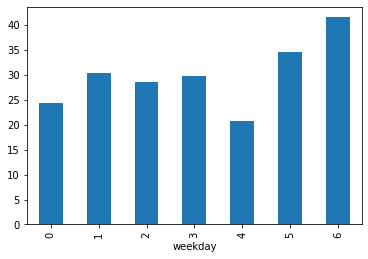

In [32]:
df.groupby('weekday').mean()['moving_time_minutes'].plot.bar()

Text(0.5, 1.0, 'Exercices')

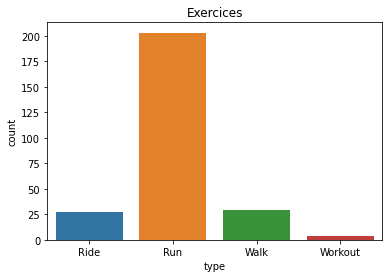

In [33]:
fig = sns.countplot(x='type', data=df).set_title('Exercices')
fig

In [34]:
df['year']= df['start_date'].map(lambda x: x.year)

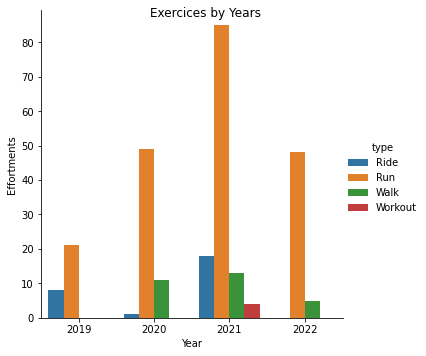

In [35]:
fig = sns.catplot(x='year', hue='type', data=df, kind='count')
fig.fig.suptitle('Exercices by Years')
fig.set_xlabels('Year')
fig.set_ylabels('Effortments')
fig

Text(0.5, 1.0, 'Average training time by day of the week')

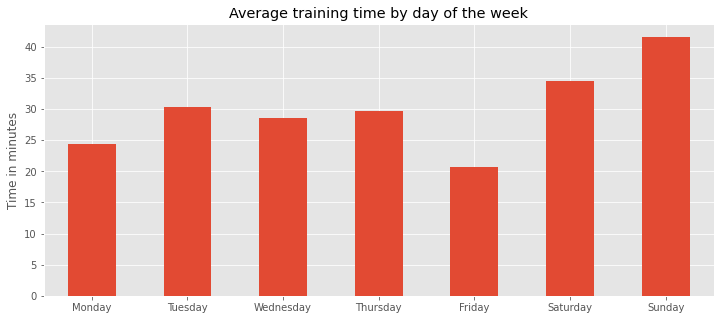

In [36]:
plt.style.use('ggplot')

df.groupby('weekday').mean()['moving_time_minutes'].plot(kind='bar', figsize=(12,5))
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal')
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week')

# Running Analysis

In [37]:
runs = df.loc[df['type'] == 'Run']
runs

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
1,2,1556.1,477,1531,26.0,Run,Run,2753195842,2019-09-30,Brasil,0,0,0,1,"[-22.067056, -50.307344]","[-22.069929, -50.306762]",3.262,3.600,NaN,NaN,NaN,602.6,589.4,2917925990.0,unknown,0,b~teC|s`rHhAxD`BrD@HRr@Vv@R`@gEaMEJDB?HLd@Vv@b...,0,20:33:06,"Rua Expedicionários, Região Imediata de Marília",7.95,1.56,5.096154,11.77,12.96,13.2,False,2019
6,2,102.0,61,61,0.0,Run,Run,2781031587,2019-10-09,Brasil,0,0,0,1,"[-22.068252, -50.309829]","[-22.0678, -50.308969]",1.672,1.900,NaN,NaN,NaN,594.4,589.9,2946937353.0,unknown,0,reueClcarHa@y@y@qB,2,21:40:58,"BAIRRO SANTA MERCEDES, Região Geográfica Int...",1.02,0.10,10.200000,5.88,6.84,4.5,False,2019
8,2,2586.9,2756,2872,54.0,Run,Run,2781127867,2019-10-11,Brasil,1,0,0,1,"[-22.067178, -50.307363]","[-22.067702, -50.308717]",0.939,3.800,NaN,NaN,NaN,597.5,588.2,2947037196.0,unknown,0,z~teC`t`rHG?@DJXDd@DPVr@T^dAjDgA_D[u@_@wAKo@Ei...,4,19:06:54,"Rua Expedicionários, Região Imediata de Marília",45.93,2.59,17.733591,3.38,13.68,9.3,False,2019
10,2,2219.2,1068,1512,39.3,Run,Run,2789528029,2019-10-14,Brasil,3,0,0,2,"[-22.067135, -50.307635]","[-22.068004, -50.309288]",2.078,3.700,NaN,NaN,NaN,597.5,588.8,2956006538.0,unknown,3,r~teCvu`rHBTVd@FVbB|DIIYw@AM_@{@iBmBHMFEJS?q@C...,0,19:50:11,"Rua Expedicionários, Região Imediata de Marília",17.80,2.22,8.018018,7.48,13.32,8.7,False,2019
11,2,4505.2,2092,2120,41.4,Run,Run,2828174770,2019-10-30,Brasil,4,1,0,2,"[-22.108612, -50.195882]","[-22.108817, -50.195598]",2.154,3.700,NaN,NaN,NaN,618.5,595.9,2997534973.0,unknown,4,za}eCh{jqHCKEBAHKXo@jAk@nAQX_@~@c@x@qA|C[l@Y^U...,2,07:15:57,"Pompeia, São Paulo",34.87,4.51,7.731707,7.76,13.32,22.6,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2,5043.1,1657,1657,25.8,Run,Run,7820148000,2022-09-16,Brasil,0,4,0,1,"[-22.103806, -50.178505]","[-22.103674, -50.178593]",3.044,4.304,79.4,162.5,178.0,597.1,587.8,8354537610.0,shealth9ed4cd9b-f960-4694-ad89-cef1d0c05c60.tcx,0,xc|eCtngqHf@yA`@q@pAcCx@cBf@{@lBmEf@}@z@mB`@o@...,4,18:24:44,"Pompeia, São Paulo",27.62,5.04,5.480159,10.95,15.49,9.3,False,2022
257,2,4364.8,1338,1338,46.4,Run,Run,8016651564,2022-10-24,Brasil,0,1,0,1,"[-22.101946, -50.180206]","[-22.101978, -50.18052]",3.262,4.253,84.2,169.9,181.0,607.9,589.2,8577390533.0,shealth030250ff-6051-454a-9fc1-52d95addcd43.tcx,0,~x{eCpugqHBWDuA?aCFwBNaC@{@BEHGr@MdC{@bAWr@YbA...,0,18:26:10,"Pompeia, São Paulo",22.30,4.36,5.114679,11.73,15.31,18.7,False,2022
258,2,4741.9,1418,1558,25.1,Run,Run,8033898138,2022-10-28,Brasil,1,4,0,1,"[-22.103477, -50.178524]","[-22.105268, -50.175827]",3.344,4.836,81.9,174.7,184.0,597.9,587.8,8596852551.0,shealth041629d1-f978-4e9b-b23b-eae1d37e51c9.tcx,0,va|eCxngqH?LVDHHND?SBG`@y@b@mAvAuCj@yAxAuCtAcC...,4,18:10:31,"Pompeia, São Paulo",23.63,4.74,4.985232,12.04,17.41,10.1,True,2022
260,2,3811.4,1129,1210,16.9,Run,Run,8055100801,2022-11-01,Brasil,0,2,0,2,"[-22.103725, -50.178867]","[-22.104502, -50.177254]",3.376,5.069,82.1,168.3,182.0,607.3,593.6,8621084759.0,shealtha7303d83-9ae2-4f1e-99c3-3526cdeaf434.tcx,0,hc|eC|pgqHGDy@fBG^[dAMn@c@fDUpCAh@In@CfASbBWrC...,1,19:25:02,"Pompeia, São Paulo",18.82,3.81,4.939633,12.15,18.25,13.7,True,2022


In [38]:
runs.isnull().sum()

resource_state            0
distance                  0
moving_time               0
elapsed_time              0
total_elevation_gain      0
type                      0
sport_type                0
id                        0
start_date                0
location_country          0
achievement_count         0
kudos_count               0
comment_count             0
athlete_count             0
start_latlng              0
end_latlng                0
average_speed             0
max_speed                 0
average_cadence          46
average_heartrate       123
max_heartrate           123
elev_high                 0
elev_low                  0
upload_id                 0
external_id               0
pr_count                  0
map.summary_polyline      0
weekday                   0
start_time                0
location                  0
moving_time_minutes       0
distance_km               0
pace                      0
avg_speed_kmh             0
max_speed_kmh             0
elev                

In [39]:
runs.max()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/2252826134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  runs.max()


resource_state                                                          2
distance                                                          13578.7
moving_time                                                          4822
elapsed_time                                                         5340
total_elevation_gain                                                243.5
type                                                                  Run
sport_type                                                            Run
id                                                             8084194066
start_date                                                     2022-11-07
location_country                                                   Brasil
achievement_count                                                       7
kudos_count                                                            12
comment_count                                                           5
athlete_count                         

In [40]:
runs.min()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/584941241.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  runs.min()


resource_state                                                          2
distance                                                            102.0
moving_time                                                            54
elapsed_time                                                           58
total_elevation_gain                                                  0.0
type                                                                  Run
sport_type                                                            Run
id                                                             2753195842
start_date                                                     2019-09-30
location_country                                                   Brasil
achievement_count                                                       0
kudos_count                                                             0
comment_count                                                           0
athlete_count                         

In [41]:
runs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
resource_state,203.0,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
distance,203.0,5.086901e+03,2.140993e+03,1.020000e+02,3.591100e+03,5.043100e+03,6.100000e+03,1.357870e+04
moving_time,203.0,1.788064e+03,7.901415e+02,5.400000e+01,1.376500e+03,1.613000e+03,2.243500e+03,4.822000e+03
elapsed_time,203.0,1.835320e+03,8.001756e+02,5.800000e+01,1.414500e+03,1.635000e+03,2.291500e+03,5.340000e+03
total_elevation_gain,203.0,5.658473e+01,5.418068e+01,0.000000e+00,1.750000e+01,4.080000e+01,8.660000e+01,2.435000e+02
id,203.0,5.195094e+09,1.544625e+09,2.753196e+09,3.814897e+09,5.321213e+09,6.335396e+09,8.084194e+09
achievement_count,203.0,9.704433e-01,1.622586e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+00,7.000000e+00
kudos_count,203.0,3.970443e+00,2.184353e+00,0.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,1.200000e+01
comment_count,203.0,1.280788e-01,6.240635e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
athlete_count,203.0,1.788177e+00,3.119637e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.600000e+01


## Visualization

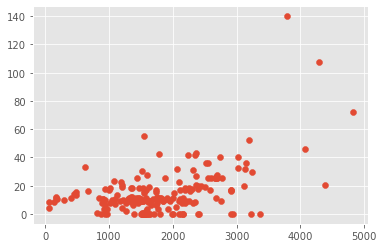

In [42]:
plt.scatter(runs['moving_time'],runs['elev'])
plt.show()

<AxesSubplot:xlabel='weekday'>

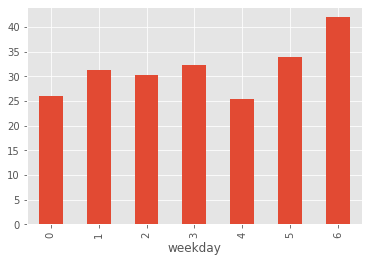

In [43]:
runs.groupby('weekday').mean()['moving_time_minutes'].plot.bar()

<AxesSubplot:xlabel='weekday'>

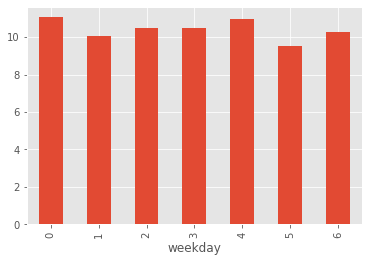

In [44]:
runs.groupby('weekday').mean()['avg_speed_kmh'].plot.bar()

<AxesSubplot:xlabel='weekday'>

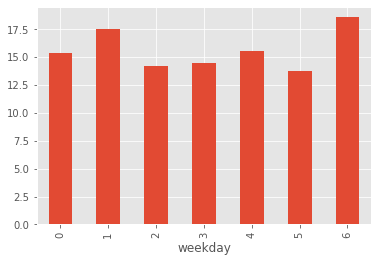

In [45]:
runs.groupby('weekday').mean()['max_speed_kmh'].plot.bar()

<AxesSubplot:xlabel='weekday'>

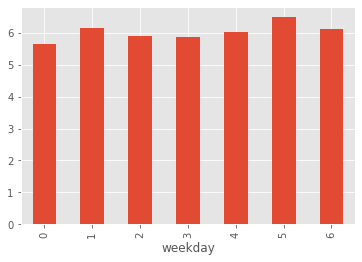

In [46]:
runs.groupby('weekday').mean()['pace'].plot.bar()

Text(0.5, 1.0, 'All Time vs Elevation')

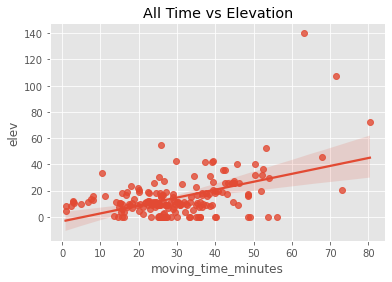

In [47]:
sns.regplot(x='moving_time_minutes', y = 'elev', data=runs).set_title("All Time vs Elevation")

In [48]:
runs[runs['avg_speed_kmh'] == runs['avg_speed_kmh'].max()]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
159,2,319.1,54,58,7.6,Run,Run,5692067508,2021-07-26,Brasil,0,4,0,1,"[-22.06703, -50.298187]","[-22.06692, -50.29827]",5.909,8.9,86.6,156.5,176.0,601.2,592.6,6054785284.0,shealthd7bb339c-aa4d-488d-af5d-48449bcfb4e7.tcx,0,|}teCtz~qHXcBGCKUYOoAEy@OGFCtAN^fAXHLp@L,0,18:17:55,"Rua Oitil, Região Geográfica Intermediária d...",0.9,0.32,2.8125,21.33,32.04,8.6,True,2021


Text(0.5, 1.0, 'Average Speed vs Distance')

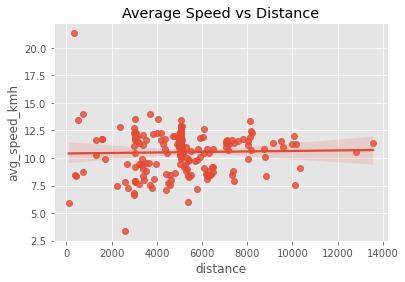

In [49]:
sns.regplot(x='distance', y = 'avg_speed_kmh', data=runs).set_title("Average Speed vs Distance")

In [50]:
runs[runs['max_speed_kmh'] == runs['max_speed_kmh'].max()]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
156,2,3045.9,1054,1054,75.6,Run,Run,5666396963,2021-07-21,Brasil,1,7,0,5,"[-22.073385, -50.307487]","[-22.073723, -50.307312]",2.89,10.8,82.7,168.3,187.0,605.8,595.6,6027952048.0,shealth201fe450-a46a-405f-b344-dd818e439b61.tcx,0,teveCxt`rHb@fAHFn@c@BIAS[i@_B_EKK_@?e@P?JZr@\j...,2,19:10:34,"Rua Mario Nery de Souza Campos, Região Imedi...",17.57,3.05,5.760656,10.42,38.88,10.2,False,2021


Text(0.5, 1.0, 'Max Speed vs Distance')

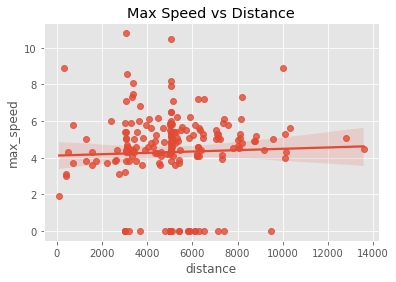

In [51]:
sns.regplot(x='distance', y = 'max_speed', data=runs).set_title("Max Speed vs Distance")

In [52]:
runs[runs['pace'] == runs['pace'].min()]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
159,2,319.1,54,58,7.6,Run,Run,5692067508,2021-07-26,Brasil,0,4,0,1,"[-22.06703, -50.298187]","[-22.06692, -50.29827]",5.909,8.9,86.6,156.5,176.0,601.2,592.6,6054785284.0,shealthd7bb339c-aa4d-488d-af5d-48449bcfb4e7.tcx,0,|}teCtz~qHXcBGCKUYOoAEy@OGFCtAN^fAXHLp@L,0,18:17:55,"Rua Oitil, Região Geográfica Intermediária d...",0.9,0.32,2.8125,21.33,32.04,8.6,True,2021


Text(0.5, 1.0, 'Moving Time vs Pace')

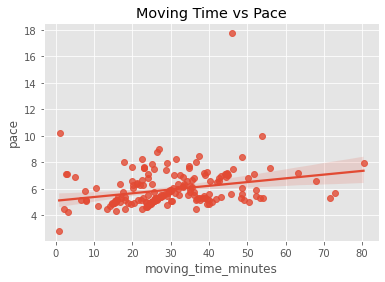

In [53]:
sns.regplot(x='moving_time_minutes', y = 'pace', data=runs).set_title("Moving Time vs Pace")

Text(0.5, 1.0, 'Distance vs Pace')

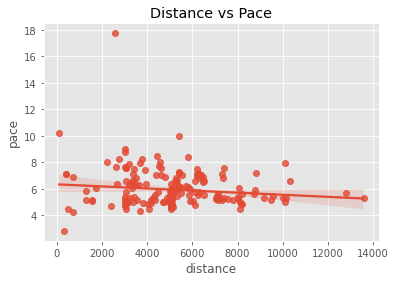

In [54]:
sns.regplot(x='distance', y = 'pace', data=runs).set_title("Distance vs Pace")

In [55]:
runs[runs['average_heartrate'] == runs['average_heartrate'].max()]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
246,2,1724.3,625,1985,38.7,Run,Run,7478821502,2022-07-16,Brasil,0,3,0,26,"[-21.930779, -50.734997]","[-21.923746, -50.732327]",2.759,3.815,80.9,183.0,183.0,463.3,430.0,7972460128.0,shealthdd06d734-16c9-4a5f-a978-10f45d46b203.tcx,0,jjzdCvdttHVJlAR|@XhA`@pAVr@XxA^PHj@H`@Lh@HLHb@...,5,09:00:29,"Bastos, São Paulo",10.42,1.72,6.05814,9.9,13.73,33.3,False,2022


Text(0.5, 1.0, 'Moving Time vs Avg. Heart Rate')

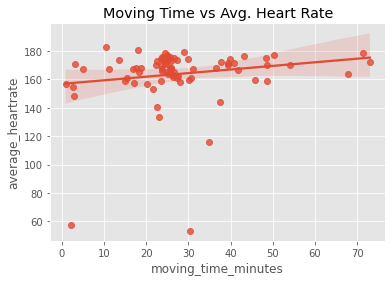

In [56]:
sns.regplot(x='moving_time_minutes', y='average_heartrate', data=runs).set_title("Moving Time vs Avg. Heart Rate")

In [57]:
runs[runs['max_heartrate'] == runs['max_heartrate'].max()]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
251,2,5040.5,1467,1467,21.1,Run,Run,7683587125,2022-08-22,Brasil,2,8,0,1,"[-22.10379, -50.17853]","[-22.105629, -50.17524]",3.436,4.738,86.3,178.6,206.0,604.2,593.6,8200457942.0,shealthb8915e5c-d94b-4839-a2ca-17c0427d799a.tcx,0,tc|eCxngqHbAeBb@cAXi@t@gBp@qAn@}AZk@\y@\m@dA{B...,0,18:15:53,"Pompeia, São Paulo",24.45,5.04,4.85119,12.37,17.06,10.6,True,2022


Text(0.5, 1.0, 'Moving Time vs Max. Heart Rate')

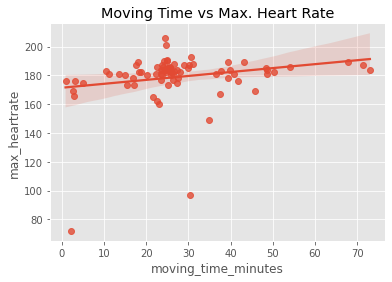

In [58]:
sns.regplot(x='moving_time_minutes', y='max_heartrate', data=runs).set_title("Moving Time vs Max. Heart Rate")

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/3097083979.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


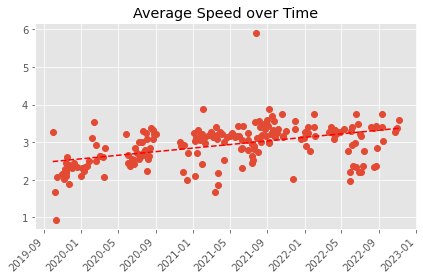

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(runs.start_date)
y = np.asarray(runs.average_speed)

ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

#add trend line
x2 = mdates.date2num(x)

z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

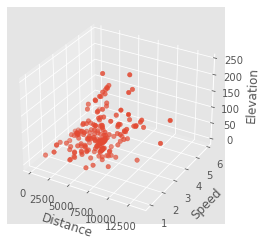

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = runs['distance']
y = runs['average_speed']
z = runs['total_elevation_gain']

ax.set_xlabel("Distance")
ax.set_ylabel("Speed")
ax.set_zlabel("Elevation")

ax.scatter(x, y, z)

plt.show()

In [61]:
startdate = pd.to_datetime("2021-01-01").date()
recently_runs = runs.loc[runs['start_date'] > startdate]

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/2438023629.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


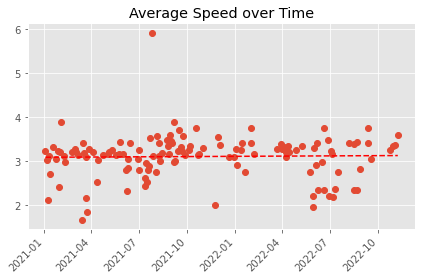

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(recently_runs.start_date)
y = np.asarray(recently_runs.average_speed)

ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

#add trend line
x1 = mdates.date2num(x)

z=np.polyfit(x1,y,1)
p=np.poly1d(z)
plt.plot(x,p(x1),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/2503613642.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


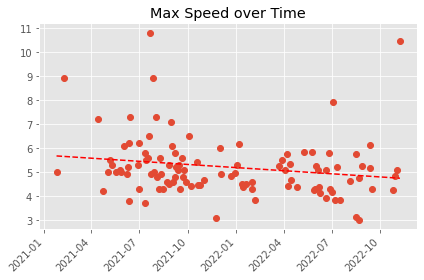

In [63]:
#max speed over time
fig = plt.figure()
ax2 = fig.add_subplot(111)

recently_runs = recently_runs.drop(recently_runs[recently_runs.max_speed == 0].index)


x = np.asarray(recently_runs.start_date)
y = np.asarray(recently_runs.max_speed)

ax2.plot_date(x, y)
ax2.set_title('Max Speed over Time')

#add trend line
x2 = mdates.date2num(x)

z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

## Machine Learning 

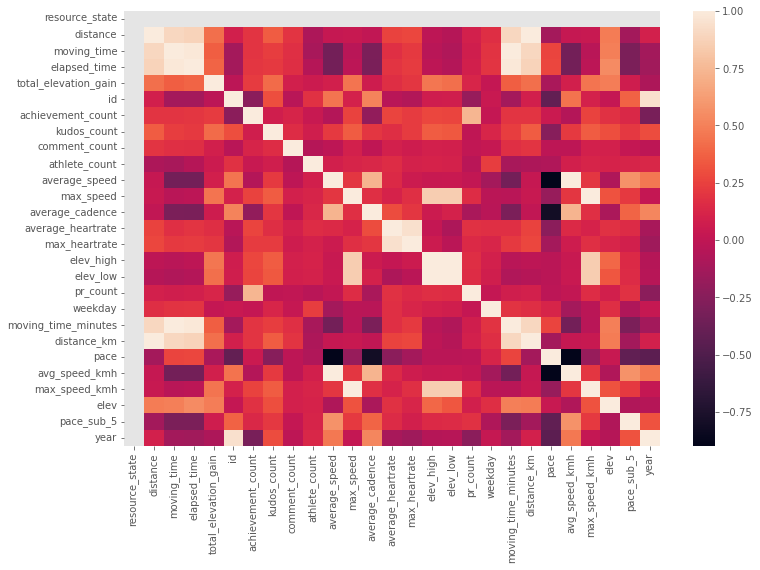

In [64]:
corr = runs.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, fmt=".2f");

In [65]:
categorical_cols = [col for col in runs.columns if runs[col].dtypes == 'O']
categorical_cols

['type',
 'sport_type',
 'start_date',
 'location_country',
 'start_latlng',
 'end_latlng',
 'upload_id',
 'external_id',
 'map.summary_polyline',
 'start_time',
 'location']

In [66]:
runs['average_cadence'] = runs['average_cadence'].fillna(value=runs['average_cadence'].mean())
runs['average_heartrate'] = runs['average_heartrate'].fillna(value=runs['average_heartrate'].mean())
runs['max_heartrate'] = runs['max_heartrate'].fillna(value=runs['max_heartrate'].mean())

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/1595046250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['average_cadence'] = runs['average_cadence'].fillna(value=runs['average_cadence'].mean())
/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/1595046250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['average_heartrate'] = runs['average_heartrate'].fillna(value=runs['average_heartrate'].mean())
/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_725

In [85]:
runs = runs.sample(frac=1).reset_index(drop=True)

In [86]:
X = runs.drop(categorical_cols, axis=1)
X_columns = X.columns
X = StandardScaler().fit_transform(X)
X

array([[ 0.        , -0.48124516, -0.89580103, ...,  2.05064093,
         1.31692102, -0.98936627],
       [ 0.        ,  0.53373211,  1.10624686, ..., -0.48765242,
        -1.9432615 , -0.07645103],
       [ 0.        , -0.80422866, -0.56085765, ..., -0.48765242,
        -0.85653399, -0.07645103],
       ...,
       [ 0.        ,  0.14660141,  1.82180771, ..., -0.48765242,
         0.23019351,  0.83646421],
       [ 0.        , -0.53242246, -0.36420529, ..., -0.48765242,
         0.23019351, -0.98936627],
       [ 0.        , -0.66015498, -1.06961634, ...,  2.05064093,
         0.23019351,  0.83646421]])

### Clustering

In [87]:
model = KMeans(n_clusters=4)
model.fit(X)
runs['Cluster'] = model.labels_

In [88]:
runs['Cluster'].value_counts()

1    81
0    57
3    33
2    32
Name: Cluster, dtype: int64

In [89]:
runs.groupby('Cluster').mean()

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,id,achievement_count,kudos_count,comment_count,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,weekday,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,4607.224561,1932.491228,1966.526316,53.740351,3.734550e+09,1.578947,3.280702,0.228070,1.456140,2.387263,4.754912,74.004794,161.702127,177.585088,607.073684,592.547368,0.526316,2.157895,32.207895,4.607018,7.189221,8.591579,17.117544,14.526316,0.000000,2019.894737
1,2.0,4007.164198,1237.172840,1303.567901,60.213580,6.073776e+09,0.691358,4.395062,0.024691,2.469136,3.266691,5.297272,81.968609,163.964167,179.097531,604.414815,591.504938,0.296296,1.716049,20.619753,4.007284,5.174985,11.760247,19.070123,12.909877,0.407407,2021.222222
2,2.0,5191.790625,1855.000000,1855.000000,0.000000,4.917806e+09,0.000000,2.218750,0.000000,1.000000,2.891125,0.000000,79.157325,163.836250,178.950000,0.000000,0.000000,0.000000,1.531250,30.916875,5.191875,5.989879,10.407813,0.000000,0.000000,0.062500,2020.875000
3,2.0,8463.987879,2825.878788,2894.818182,107.460606,5.829971e+09,1.545455,5.818182,0.333333,1.454545,3.047182,5.267000,81.156727,167.208485,180.945455,606.269697,573.333333,0.454545,2.151515,47.098788,8.464242,5.544452,10.971212,18.961212,32.936364,0.121212,2021.181818


In [90]:
runs.groupby('Cluster').std()

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,id,achievement_count,kudos_count,comment_count,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,weekday,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1453.858249,588.147671,587.352690,31.562992,1.364640e+09,2.120877,1.970808,0.824135,0.502500,0.332016,1.213010,6.095415,8.357074,5.311745,9.159861,7.166716,1.283206,1.709109,9.802248,1.454193,1.650790,1.200465,4.366896,9.761871,0.000000,0.880021
1,0.0,1477.123301,461.009376,477.861145,57.829192,1.323134e+09,1.136244,1.678385,0.222222,4.832407,0.422238,1.360468,2.466858,18.583762,16.460667,19.527533,21.169825,0.765579,1.831902,7.683236,1.477530,0.604967,1.529663,4.897810,8.121170,0.494413,0.741620
2,0.0,1381.513611,608.298261,608.298261,0.000000,6.244830e+08,0.000000,1.408142,0.000000,0.000000,0.515892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.544697,10.138120,1.381144,1.331261,1.858058,0.000000,0.000000,0.245935,0.491869
3,0.0,1673.298528,724.816604,777.371953,50.078869,8.948288e+08,1.838663,2.542815,1.020621,0.711113,0.333951,1.017609,3.610946,5.175678,4.131214,13.705256,32.870225,0.971175,1.922258,12.080184,1.673079,0.718896,1.202372,3.663308,27.258712,0.331434,0.583874


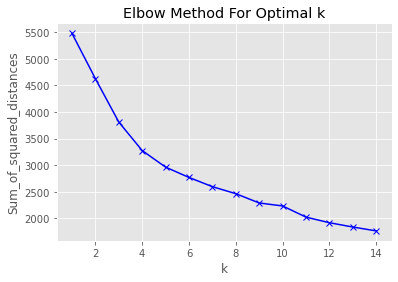

In [91]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
runs[runs['Cluster'] == 2]

,resource_state,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,location_country,achievement_count,kudos_count,comment_count,athlete_count,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,elev_low,upload_id,external_id,pr_count,map.summary_polyline,weekday,start_time,location,moving_time_minutes,distance_km,pace,avg_speed_kmh,max_speed_kmh,elev,pace_sub_5,year,Cluster
20,2,5000.0,1560,1560,0.0,Run,Run,4874154264,2021-02-24,Brasil,0,1,0,1,[],[],3.205,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,2,17:47:02,unknown,26.00,5.00,5.200000,11.54,0.0,0.0,False,2021,2
29,2,5000.0,1545,1545,0.0,Run,Run,4568277805,2021-01-04,Brasil,0,4,0,1,[],[],3.236,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,0,18:30:56,unknown,25.75,5.00,5.150000,11.65,0.0,0.0,False,2021,2
36,2,6500.0,2160,2160,0.0,Run,Run,4380175011,2020-11-18,Brasil,0,1,0,1,[],[],3.009,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,2,17:37:09,unknown,36.00,6.50,5.538462,10.83,0.0,0.0,False,2020,2
40,2,6100.0,2100,2100,0.0,Run,Run,4381518913,2020-11-23,Brasil,0,1,0,1,[],[],2.905,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,0,18:00:09,unknown,35.00,6.10,5.737705,10.46,0.0,0.0,False,2020,2
43,2,6100.0,2410,2410,0.0,Run,Run,5128124964,2021-04-12,Brasil,0,1,0,1,[],[],2.531,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,0,17:30:37,unknown,40.17,6.10,6.585246,9.11,0.0,0.0,False,2021,2
63,2,5000.0,1525,1525,0.0,Run,Run,5036628031,2021-03-29,Brasil,0,2,0,1,[],[],3.279,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,0,18:11:53,unknown,25.42,5.00,5.084000,11.80,0.0,0.0,False,2021,2
64,2,5000.0,1550,1550,0.0,Run,Run,4706331966,2021-01-28,Brasil,0,2,0,1,[],[],3.226,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,3,18:27:57,unknown,25.83,5.00,5.166000,11.61,0.0,0.0,False,2021,2
73,2,3017.4,1388,1388,0.0,Run,Run,5036596830,2021-03-23,Brasil,0,1,0,1,[],[],2.174,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,1,17:44:34,unknown,23.13,3.02,7.658940,7.83,0.0,0.0,False,2021,2
84,2,3200.0,1514,1514,0.0,Run,Run,4616950169,2021-01-09,Brasil,0,0,0,1,[],[],2.114,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,5,19:23:19,unknown,25.23,3.20,7.884375,7.61,0.0,0.0,False,2021,2
91,2,9500.0,2951,2951,0.0,Run,Run,4885881772,2021-03-03,Brasil,0,4,0,1,[],[],3.219,0.0,79.157325,163.83625,178.95,0.0,0.0,unknown,unknown,0,unknown,2,17:57:54,unknown,49.18,9.50,5.176842,11.59,0.0,0.0,False,2021,2


### Regression

In [93]:
y = runs['pace_sub_5']
X = runs.drop('pace_sub_5',1)

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7258/1292765664.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = runs.drop('pace_sub_5',1)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
regressor = autosklearn.regression.AutoSklearnClassifier(time_left_for_this_task=60*15)
regressor.fit(X_train, y_train)

In [ ]:
print(regressor.sprint_statistics())

In [ ]:
print(regressor.show_models())

In [ ]:
predictions = regressor.predict(X_test)
predictions